In [ ]:
import pandas as pd
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/stocks_data/all_stocks_historical_data.csv'


# for local connect
# file_path = 'all_stocks_historical_data.csv'




# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df = df.sort_values(by=['instrument_token', 'timestamps'])

# Display the first few rows of the dataframe
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,oi,created_at
287554,4374999,GOLDSTAR-SM,257,2019-02-21 00:00:00,1.30,1.30,1.15,1.25,405000,0,2024-04-04 11:24:44.205169
287555,4375001,GOLDSTAR-SM,257,2019-02-25 00:00:00,1.15,1.30,1.15,1.30,270000,0,2024-04-04 11:24:44.205172
287556,4375008,GOLDSTAR-SM,257,2019-03-07 00:00:00,1.20,1.20,1.20,1.20,135000,0,2024-04-04 11:24:44.205173
287557,4375010,GOLDSTAR-SM,257,2019-03-19 00:00:00,1.15,1.25,1.15,1.25,540000,0,2024-04-04 11:24:44.205174
287558,4375013,GOLDSTAR-SM,257,2019-04-22 00:00:00,1.15,1.15,1.15,1.15,135000,0,2024-04-04 11:24:44.205174


In [ ]:
df = df.drop(['oi', 'created_at'], axis=1)

In [ ]:
def print_nan_counts(df):
    """
    This function checks for NaN values in each column of the given DataFrame
    and prints the column names along with their NaN counts and percentage of total records.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for NaN values.
    """
    total_records = len(df)

    # Check for NaN values in each column and get their count
    nan_counts = df.isna().sum()

    # Filter columns that have NaN values and their counts
    nan_columns = nan_counts[nan_counts > 0]

    # Calculate the percentage of NaN values in each column
    nan_percentages = (nan_columns / total_records) * 100

    # Print each column name and its NaN count and percentage explicitly
    if nan_columns.empty:
        print("No NaN values found.")
    else:
        for column, count in nan_columns.items():
            percentage = nan_percentages[column]
            print(f'{column}: {count} ({percentage:.2f}%)')


In [ ]:
# check nan values in data frame
print_nan_counts(df)

No NaN values found.


In [ ]:
# List of trading symbols to filter
symbols = ['INDIA VIX', 'NIFTY 50', 'NIFTY 500',
       'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY ENERGY',
       'NIFTY FMCG',
       'NIFTY HEALTHCARE', 'NIFTY INDIA MFG',
        'NIFTY IT',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY',  'NIFTY SMLCAP 100']

# Filter the dataframe for the given symbols
filtered_df = df[df['tradingsymbol'].isin(symbols)]

# Pivot the dataframe to get each trading symbol as a column
pivoted_df = filtered_df.pivot(index='timestamps', columns='tradingsymbol', values='close_price')

def g(pivoted_df):
    pct_change = pivoted_df.pct_change() * 100
    return pct_change.sort_index(axis=0)

pivoted_df = g(pivoted_df.copy())


# Display the first few rows of the pivoted dataframe
print(pivoted_df.head())

tradingsymbol        INDIA VIX  NIFTY 50  NIFTY 500  NIFTY AUTO  NIFTY BANK  \
timestamps                                                                    
2019-01-02 00:00:00        NaN       NaN        NaN         NaN         NaN   
2019-01-03 00:00:00   2.440513 -1.114200  -0.973373   -1.519772   -0.790625   
2019-01-04 00:00:00  -3.752233  0.516292   0.444935    0.479050    0.872223   
2019-01-07 00:00:00   0.866337  0.414361   0.289898    0.120894    0.402831   
2019-01-08 00:00:00  -3.680982  0.281754   0.192707    0.449546    0.750607   

tradingsymbol        NIFTY COMMODITIES  NIFTY CONSR DURBL  NIFTY CONSUMPTION  \
timestamps                                                                     
2019-01-02 00:00:00                NaN                NaN                NaN   
2019-01-03 00:00:00          -2.022829          -0.462382          -0.369373   
2019-01-04 00:00:00           1.064911          -0.290619           0.097294   
2019-01-07 00:00:00           0.429281        

In [ ]:
# Ensure timestamps is a column in pivoted_df for merging
pivoted_df.reset_index(inplace=True)

# Merge the two dataframes on 'timestamps' column
# Assuming you want to keep all rows and columns from the original df and just add the closing prices from pivoted_df
merged_df = pd.merge(df, pivoted_df, on='timestamps', how='left')

# Display the first few rows of the merged dataframe
print(merged_df.head())


        id tradingsymbol  instrument_token           timestamps  open_price  \
0  4374999   GOLDSTAR-SM               257  2019-02-21 00:00:00        1.30   
1  4375001   GOLDSTAR-SM               257  2019-02-25 00:00:00        1.15   
2  4375008   GOLDSTAR-SM               257  2019-03-07 00:00:00        1.20   
3  4375010   GOLDSTAR-SM               257  2019-03-19 00:00:00        1.15   
4  4375013   GOLDSTAR-SM               257  2019-04-22 00:00:00        1.15   

   high_price  low_price  close_price  volume  INDIA VIX  ...  NIFTY IT  \
0        1.30       1.15         1.25  405000  -5.920281  ... -0.131651   
1        1.30       1.15         1.30  270000  -0.582524  ...  2.033829   
2        1.20       1.20         1.20  135000  -2.049968  ... -0.972034   
3        1.25       1.15         1.25  540000  -2.426036  ...  0.886099   
4        1.15       1.15         1.15  135000   5.760774  ...  0.443427   

   NIFTY MEDIA  NIFTY METAL  NIFTY MICROCAP250  NIFTY PHARMA  NIFTY PSE  \

In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)

INDIA VIX: 1323 (0.06%)
NIFTY 50: 1323 (0.06%)
NIFTY 500: 1323 (0.06%)
NIFTY AUTO: 1323 (0.06%)
NIFTY BANK: 1323 (0.06%)
NIFTY COMMODITIES: 1323 (0.06%)
NIFTY CONSR DURBL: 1323 (0.06%)
NIFTY CONSUMPTION: 1323 (0.06%)
NIFTY CPSE: 1323 (0.06%)
NIFTY ENERGY: 1323 (0.06%)
NIFTY FMCG: 1323 (0.06%)
NIFTY HEALTHCARE: 1323 (0.06%)
NIFTY INDIA MFG: 1323 (0.06%)
NIFTY IT: 1323 (0.06%)
NIFTY MEDIA: 1323 (0.06%)
NIFTY METAL: 1323 (0.06%)
NIFTY MICROCAP250: 1323 (0.06%)
NIFTY PHARMA: 1323 (0.06%)
NIFTY PSE: 1323 (0.06%)
NIFTY PSU BANK: 1323 (0.06%)
NIFTY PVT BANK: 1323 (0.06%)
NIFTY REALTY: 1323 (0.06%)
NIFTY SMLCAP 100: 1323 (0.06%)


In [ ]:
def fill_nan_values(df):
    """
    This function fills NaN values in each column of the given DataFrame
    with the mean of that column. If the column is entirely NaN, it fills with 0.

    Parameters:
    df (pandas.DataFrame): The DataFrame in which NaN values will be filled.
    """
    for column in df.columns:
        # Check if the column has NaN values
        if df[column].isna().sum() > 0:
            mean_value = df[column].mean()
            # If the mean is NaN (column is entirely NaN), set to 0 or another appropriate value
            if pd.isna(mean_value):
                df[column].fillna(0, inplace=True)
            else:
                df[column].fillna(mean_value, inplace=True)

    return df


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)

INDIA VIX: 1323 (0.06%)
NIFTY 50: 1323 (0.06%)
NIFTY 500: 1323 (0.06%)
NIFTY AUTO: 1323 (0.06%)
NIFTY BANK: 1323 (0.06%)
NIFTY COMMODITIES: 1323 (0.06%)
NIFTY CONSR DURBL: 1323 (0.06%)
NIFTY CONSUMPTION: 1323 (0.06%)
NIFTY CPSE: 1323 (0.06%)
NIFTY ENERGY: 1323 (0.06%)
NIFTY FMCG: 1323 (0.06%)
NIFTY HEALTHCARE: 1323 (0.06%)
NIFTY INDIA MFG: 1323 (0.06%)
NIFTY IT: 1323 (0.06%)
NIFTY MEDIA: 1323 (0.06%)
NIFTY METAL: 1323 (0.06%)
NIFTY MICROCAP250: 1323 (0.06%)
NIFTY PHARMA: 1323 (0.06%)
NIFTY PSE: 1323 (0.06%)
NIFTY PSU BANK: 1323 (0.06%)
NIFTY PVT BANK: 1323 (0.06%)
NIFTY REALTY: 1323 (0.06%)
NIFTY SMLCAP 100: 1323 (0.06%)


In [ ]:
def print_total_records(df):
    """
    This function prints the total number of records in the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check the total records of.
    """
    total_records = len(df)
    print(f'Total records: {total_records}')

print_total_records(merged_df)


Total records: 2259780


In [ ]:
# Sort the dataframe by 'timestamps' column in ascending order (oldest to newest)
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Display the first few rows of the sorted dataframe
merged_df.head()


,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,INDIA VIX,...,NIFTY IT,NIFTY MEDIA,NIFTY METAL,NIFTY MICROCAP250,NIFTY PHARMA,NIFTY PSE,NIFTY PSU BANK,NIFTY PVT BANK,NIFTY REALTY,NIFTY SMLCAP 100
0,4374999,GOLDSTAR-SM,257,2019-02-21 00:00:00,1.30,1.30,1.15,1.25,405000,-5.920281,...,-0.131651,1.092665,1.126582,1.586086,1.161933,0.301902,0.495871,0.352496,0.393529,1.440182
1,4375001,GOLDSTAR-SM,257,2019-02-25 00:00:00,1.15,1.30,1.15,1.30,270000,-0.582524,...,2.033829,-0.256801,0.348322,1.131224,0.497002,-0.216763,-0.232232,1.117211,-0.729144,0.756081
2,4375008,GOLDSTAR-SM,257,2019-03-07 00:00:00,1.20,1.20,1.20,1.20,135000,-2.049968,...,-0.972034,-1.845783,-0.941648,0.407480,-1.194429,-1.119174,1.408427,0.227117,-0.337767,-0.344787
3,4375010,GOLDSTAR-SM,257,2019-03-19 00:00:00,1.15,1.25,1.15,1.25,540000,-2.426036,...,0.886099,0.705915,-0.033021,0.166718,0.430747,1.040704,1.873056,0.510477,0.115964,1.000726
4,4375013,GOLDSTAR-SM,257,2019-04-22 00:00:00,1.15,1.15,1.15,1.15,135000,5.760774,...,0.443427,-0.903323,-1.792691,-1.235957,-1.322543,-1.997975,-2.451247,-2.053578,-2.477811,-1.764380


In [ ]:
merged_df.tail()

,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,INDIA VIX,...,NIFTY IT,NIFTY MEDIA,NIFTY METAL,NIFTY MICROCAP250,NIFTY PHARMA,NIFTY PSE,NIFTY PSU BANK,NIFTY PVT BANK,NIFTY REALTY,NIFTY SMLCAP 100
2259775,3083580,SREEL,8150273,2024-03-28 00:00:00,283.00,288.15,270.55,276.40,17496,1.023622,...,0.442662,-0.704965,1.253840,0.177805,1.213476,1.401726,2.616954,0.350394,0.547028,0.042912
2259776,3083584,SREEL,8150273,2024-04-01 00:00:00,276.50,306.00,276.50,292.05,20563,-5.845674,...,0.414492,4.688588,3.699801,3.404479,1.114700,1.865788,1.512719,1.027558,4.357964,3.260873
2259777,3083588,SREEL,8150273,2024-04-02 00:00:00,293.55,300.05,287.95,296.65,20317,-3.559603,...,-0.710132,1.853674,1.496607,1.710084,-0.118441,1.668039,0.882859,-0.065762,1.005426,1.221113
2259778,3083592,SREEL,8150273,2024-04-03 00:00:00,296.65,310.20,295.45,307.80,20637,-2.403433,...,0.728431,0.571831,0.004027,1.566986,-0.167317,0.857383,1.780924,-0.148640,-2.580713,1.161898
2259779,3083598,SREEL,8150273,2024-04-04 00:00:00,309.40,318.10,304.35,306.00,10655,-0.967458,...,1.146875,-0.119428,0.090897,0.574264,-0.066308,-0.501661,-0.473038,1.249426,0.102719,0.530459


In [ ]:
# Set the maximum number of columns to display to None (unlimited)
pd.options.display.max_columns = None

print(merged_df.tail())

              id tradingsymbol  instrument_token           timestamps  \
2259775  3083580         SREEL           8150273  2024-03-28 00:00:00   
2259776  3083584         SREEL           8150273  2024-04-01 00:00:00   
2259777  3083588         SREEL           8150273  2024-04-02 00:00:00   
2259778  3083592         SREEL           8150273  2024-04-03 00:00:00   
2259779  3083598         SREEL           8150273  2024-04-04 00:00:00   

         open_price  high_price  low_price  close_price  volume  INDIA VIX  \
2259775      283.00      288.15     270.55       276.40   17496   1.023622   
2259776      276.50      306.00     276.50       292.05   20563  -5.845674   
2259777      293.55      300.05     287.95       296.65   20317  -3.559603   
2259778      296.65      310.20     295.45       307.80   20637  -2.403433   
2259779      309.40      318.10     304.35       306.00   10655  -0.967458   

         NIFTY 50  NIFTY 500  NIFTY AUTO  NIFTY BANK  NIFTY COMMODITIES  \
2259775  0.918700

In [ ]:
# Ensure 'timestamps' column is in datetime format
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])

# Sort the DataFrame by 'instrument_token' and 'timestamps' to ensure chronological order for each instrument
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Calculate the percentage change in 'close_price' for each 'instrument_token'
# This will compare each day's close price with the previous day's close price for the same instrument_token
# Using transform to ensure alignment and adding a small number (epsilon) to avoid division by zero
epsilon = 1e-8
merged_df['%changedaily'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: (x.diff() / (x.shift() + epsilon)) * 100)

# Display the first few rows to confirm the new column has been added correctly
print(merged_df.head())


        id tradingsymbol  instrument_token timestamps  open_price  high_price  \
0  4374999   GOLDSTAR-SM               257 2019-02-21        1.30        1.30   
1  4375001   GOLDSTAR-SM               257 2019-02-25        1.15        1.30   
2  4375008   GOLDSTAR-SM               257 2019-03-07        1.20        1.20   
3  4375010   GOLDSTAR-SM               257 2019-03-19        1.15        1.25   
4  4375013   GOLDSTAR-SM               257 2019-04-22        1.15        1.15   

   low_price  close_price  volume  INDIA VIX  NIFTY 50  NIFTY 500  NIFTY AUTO  \
0       1.15         1.25  405000  -5.920281  0.506732   0.634214    0.434033   
1       1.15         1.30  270000  -0.582524  0.819615   0.718630    1.117291   
2       1.20         1.20  135000  -2.049968  0.047046  -0.055252   -0.185512   
3       1.15         1.25  540000  -2.426036  0.612448   0.561644   -0.695488   
4       1.15         1.15  135000   5.760774 -1.347339  -1.426371   -1.769265   

   NIFTY BANK  NIFTY COMMO

In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

INDIA VIX: 1323 (0.06%)
NIFTY 50: 1323 (0.06%)
NIFTY 500: 1323 (0.06%)
NIFTY AUTO: 1323 (0.06%)
NIFTY BANK: 1323 (0.06%)
NIFTY COMMODITIES: 1323 (0.06%)
NIFTY CONSR DURBL: 1323 (0.06%)
NIFTY CONSUMPTION: 1323 (0.06%)
NIFTY CPSE: 1323 (0.06%)
NIFTY ENERGY: 1323 (0.06%)
NIFTY FMCG: 1323 (0.06%)
NIFTY HEALTHCARE: 1323 (0.06%)
NIFTY INDIA MFG: 1323 (0.06%)
NIFTY IT: 1323 (0.06%)
NIFTY MEDIA: 1323 (0.06%)
NIFTY METAL: 1323 (0.06%)
NIFTY MICROCAP250: 1323 (0.06%)
NIFTY PHARMA: 1323 (0.06%)
NIFTY PSE: 1323 (0.06%)
NIFTY PSU BANK: 1323 (0.06%)
NIFTY PVT BANK: 1323 (0.06%)
NIFTY REALTY: 1323 (0.06%)
NIFTY SMLCAP 100: 1323 (0.06%)
%changedaily: 2300 (0.10%)
No NaN values found.


In [ ]:
# Define a small number to prevent division by zero
epsilon = 1e-8

# Function to calculate percentage change with epsilon to avoid division by zero
def safe_pct_change(series, periods):
    return (series.diff(periods) / (series.shift(periods) + epsilon)) * 100

# Calculate weekly percentage change
merged_df['%change_weekly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: safe_pct_change(x, periods=5))

# Calculate monthly percentage change
merged_df['%change_monthly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: safe_pct_change(x, periods=21))

# Calculate quarterly percentage change
merged_df['%change_quarterly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: safe_pct_change(x, periods=63))

# Calculate yearly percentage change
merged_df['%change_yearly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: safe_pct_change(x, periods=252))

# Display the last few rows to confirm the new columns
print(merged_df.tail())

              id tradingsymbol  instrument_token timestamps  open_price  \
2259775  3083580         SREEL           8150273 2024-03-28      283.00   
2259776  3083584         SREEL           8150273 2024-04-01      276.50   
2259777  3083588         SREEL           8150273 2024-04-02      293.55   
2259778  3083592         SREEL           8150273 2024-04-03      296.65   
2259779  3083598         SREEL           8150273 2024-04-04      309.40   

         high_price  low_price  close_price  volume  INDIA VIX  NIFTY 50  \
2259775      288.15     270.55       276.40   17496   1.023622  0.918700   
2259776      306.00     276.50       292.05   20563  -5.845674  0.605100   
2259777      300.05     287.95       296.65   20317  -3.559603 -0.038732   
2259778      310.20     295.45       307.80   20637  -2.403433 -0.083061   
2259779      318.10     304.35       306.00   10655  -0.967458  0.474935   

         NIFTY 500  NIFTY AUTO  NIFTY BANK  NIFTY COMMODITIES  \
2259775   0.833093    1.290

In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

%change_weekly: 11474 (0.51%)
%change_monthly: 47992 (2.12%)
%change_quarterly: 142268 (6.30%)
%change_yearly: 539039 (23.85%)
No NaN values found.


In [ ]:
# Ensure 'timestamps' column is in datetime format
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])

# Sort the DataFrame by 'instrument_token' and 'timestamps' to ensure chronological order for each instrument
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Calculate EMA for the specified periods for each 'instrument_token'
ema_periods = [5, 75, 200]
for period in ema_periods:
    column_name = f'EMA_{period}'
    merged_df[column_name] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=period, adjust=True).mean())

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'EMA_5', 'EMA_75', 'EMA_200']].tail())

        timestamps  instrument_token  close_price       EMA_5      EMA_75  \
2259775 2024-03-28           8150273       276.40  282.029543  316.391112   
2259776 2024-04-01           8150273       292.05  285.369695  315.750557   
2259777 2024-04-02           8150273       296.65  289.129797  315.247910   
2259778 2024-04-03           8150273       307.80  295.353198  315.051913   
2259779 2024-04-04           8150273       306.00  298.902132  314.813705   

            EMA_200  
2259775  286.787143  
2259776  286.839510  
2259777  286.937127  
2259778  287.144718  
2259779  287.332333  


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

No NaN values found.
No NaN values found.


In [ ]:
def calculate_rsi(series, period=14):
    # Calculate daily price changes
    delta = series.diff(1)

    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # Calculate the average of gains and losses
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    # Calculate the relative strength (RS)
    RS = avg_gain / avg_loss

    # Calculate the RSI
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Ensure the 'timestamps' column is in datetime format and sort the DataFrame
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Calculate RSI for specified periods and add to the DataFrame
merged_df['RSI_9'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 9))
merged_df['RSI_14'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 14))
merged_df['RSI_21'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 21))

# Display the last few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'RSI_9', 'RSI_14', 'RSI_21']].tail())

        timestamps  instrument_token  close_price      RSI_9     RSI_14  \
2259775 2024-03-28           8150273       276.40  19.764012  33.971044   
2259776 2024-04-01           8150273       292.05  54.645477  40.521658   
2259777 2024-04-02           8150273       296.65  54.589963  46.835443   
2259778 2024-04-03           8150273       307.80  68.898043  58.173785   
2259779 2024-04-04           8150273       306.00  67.987805  67.138810   

            RSI_21  
2259775  35.121234  
2259776  43.578297  
2259777  46.834136  
2259778  49.194344  
2259779  46.424941  


In [ ]:

# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

RSI_9: 21809 (0.97%)
RSI_14: 32680 (1.45%)
RSI_21: 48303 (2.14%)
No NaN values found.


In [ ]:
print(pd.__version__)

2.0.3


In [ ]:
# # Function to calculate mean deviation and CCI
# def calculate_indicators(df, periods):
#     # Pre-calculate Typical Price and store it to avoid recalculating
#     TP = (df['high_price'] + df['low_price'] + df['close_price']) / 3
#     df['TP'] = TP

#     for period in periods:
#         # Mean deviation calculation
#         SMA_TP = TP.rolling(window=period).mean()
#         deviation = TP - SMA_TP
#         mean_deviation = deviation.abs().rolling(window=period).mean()
#         df[f'mean_deviation_{period}'] = mean_deviation

#         # CCI calculation using the previously calculated mean_deviation
#         CCI = (TP - SMA_TP) / (0.015 * mean_deviation)
#         df[f'CCI_{period}'] = CCI

#     # Drop the 'TP' column as it's no longer needed after calculations
#     df.drop('TP', axis=1, inplace=True)

#     return df

# # Assuming 'merged_df' is a pre-existing pandas DataFrame with necessary columns
# # Pre-process the DataFrame
# merged_df = merged_df.reset_index(drop=True)
# merged_df = merged_df.set_index('instrument_token')
# merged_df = merged_df.sort_index(level=[0, 1])  # Sort by 'instrument_token' and then timestamps

# # Define periods for calculation
# periods = [9, 14, 21]

# # Calculate mean deviation and CCI in one go to avoid extra memory usage
# merged_df = merged_df.groupby('instrument_token', group_keys=False).apply(calculate_indicators, periods)

# # Resetting the index after processing
# merged_df = merged_df.reset_index(drop=False)

# # Display the last few rows to verify the calculations
# columns_to_display = ['timestamps', 'instrument_token', 'close_price',
#                       'mean_deviation_9', 'mean_deviation_14', 'mean_deviation_21',
#                       'CCI_9', 'CCI_14', 'CCI_21']
# print(merged_df[columns_to_display].tail())


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

No NaN values found.
No NaN values found.


In [ ]:
# Ensure the 'timestamps' column is in datetime format and sort the DataFrame
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Directly calculate the MACD for each 'instrument_token' by subtracting the 26-period EMA from the 12-period EMA
merged_df['MACD'] = merged_df.groupby('instrument_token')['close_price'].transform(
    lambda x: x.ewm(span=12, adjust=False).mean()) - merged_df.groupby('instrument_token')['close_price'].transform(
    lambda x: x.ewm(span=26, adjust=False).mean())

# Calculate the signal line for each 'instrument_token' as the 9-period EMA of the MACD
merged_df['MACD_signal'] = merged_df.groupby('instrument_token')['MACD'].transform(
    lambda x: x.ewm(span=9, adjust=False).mean())

# Display the last few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'MACD', 'MACD_signal']].tail())


        timestamps  instrument_token  close_price       MACD  MACD_signal
2259775 2024-03-28           8150273       276.40 -13.047098   -13.101949
2259776 2024-04-01           8150273       292.05 -11.805117   -12.842583
2259777 2024-04-02           8150273       296.65 -10.330573   -12.340181
2259778 2024-04-03           8150273       307.80  -8.168117   -11.505768
2259779 2024-04-04           8150273       306.00  -6.524391   -10.509493


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

No NaN values found.
No NaN values found.


In [ ]:
# Ensure the 'timestamps' column is in datetime format and sort the DataFrame
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Directly calculate the percentage change of the current close_price with the VWAP on a rolling 5-day basis
merged_df['%change_close_VWAP'] = merged_df.groupby('instrument_token').apply(
    lambda x: ((x['close_price'] - (x['close_price'] * x['volume']).rolling(window=5).sum() / x['volume'].rolling(window=5).sum())
               / ((x['close_price'] * x['volume']).rolling(window=5).sum() / x['volume'].rolling(window=5).sum())) * 100
).reset_index(level=0, drop=True)

# Display the last few rows to confirm the new column and the calculation
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', '%change_close_VWAP']].tail())


        timestamps  instrument_token  close_price  volume  %change_close_VWAP
2259775 2024-03-28           8150273       276.40   17496           -2.462965
2259776 2024-04-01           8150273       292.05   20563            2.818850
2259777 2024-04-02           8150273       296.65   20317            3.861833
2259778 2024-04-03           8150273       307.80   20637            5.788823
2259779 2024-04-04           8150273       306.00   10655            3.616019


In [ ]:


# Assuming merged_df is already defined and includes 'timestamps', 'instrument_token', 'close_price', and 'volume'

# Preprocessing to ensure the data is sorted properly
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Define a function to calculate percentage changes from VWAP without storing VWAP values in the DataFrame
def calculate_percentage_changes(group):
    # Calculate VWAP within the group but don't store in the DataFrame
    VWAP_weekly = (group['close_price'] * group['volume']).rolling(window=5).sum() / group['volume'].rolling(window=5).sum()
    VWAP_monthly = (group['close_price'] * group['volume']).rolling(window=21).sum() / group['volume'].rolling(window=21).sum()
    VWAP_yearly = (group['close_price'] * group['volume']).rolling(window=252).sum() / group['volume'].rolling(window=252).sum()

    # Calculate and store percentage changes directly in the group DataFrame
    group['%change_close_VWAP_monthly'] = ((group['close_price'] - VWAP_monthly) / VWAP_monthly) * 100
    group['%change_close_VWAP_yearly'] = ((group['close_price'] - VWAP_yearly) / VWAP_yearly) * 100

    # Replace potential infinite values with NaN in percentage changes
    group['%change_close_VWAP_monthly'].replace([np.inf, -np.inf], np.nan, inplace=True)
    group['%change_close_VWAP_yearly'].replace([np.inf, -np.inf], np.nan, inplace=True)

    return group

# Apply the function to each group to calculate and add percentage changes
merged_df = merged_df.groupby('instrument_token').apply(calculate_percentage_changes)

# Display the last few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', '%change_close_VWAP_monthly', '%change_close_VWAP_yearly']].tail())


                         timestamps  instrument_token  close_price  volume  \
instrument_token                                                             
8150273          2259775 2024-03-28           8150273       276.40   17496   
                 2259776 2024-04-01           8150273       292.05   20563   
                 2259777 2024-04-02           8150273       296.65   20317   
                 2259778 2024-04-03           8150273       307.80   20637   
                 2259779 2024-04-04           8150273       306.00   10655   

                          %change_close_VWAP_monthly  \
instrument_token                                       
8150273          2259775                   -5.973669   
                 2259776                   -0.225720   
                 2259777                    1.531357   
                 2259778                    5.178941   
                 2259779                    4.497830   

                          %change_close_VWAP_yearly  
instru

In [ ]:
# Function to calculate CCI (without storing mean deviation separately)
def calculate_indicators(df, periods):
    # Pre-calculate Typical Price and store it to avoid recalculating
    TP = (df['high_price'] + df['low_price'] + df['close_price']) / 3
    df['TP'] = TP

    for period in periods:
        # Mean deviation calculation only for use in CCI formula
        SMA_TP = TP.rolling(window=period).mean()
        mean_deviation = (TP - SMA_TP).abs().rolling(window=period).mean()

        # CCI calculation using the mean_deviation
        CCI = (TP - SMA_TP) / (0.015 * mean_deviation)
        df[f'CCI_{period}'] = CCI

    # Drop the 'TP' column as it's no longer needed after calculations
    df.drop('TP', axis=1, inplace=True)

    return df

# Assuming 'merged_df' is a pre-existing pandas DataFrame with necessary columns
# Pre-process the DataFrame
merged_df = merged_df.reset_index(drop=True)
merged_df = merged_df.set_index('instrument_token')
merged_df = merged_df.sort_index(level=[0, 1])  # Sort by 'instrument_token' and then timestamps

# Define periods for calculation
periods = [9, 14, 21]

# Calculate CCI in one go to avoid extra memory usage
merged_df = merged_df.groupby('instrument_token', group_keys=False).apply(calculate_indicators, periods)

# Resetting the index after processing
merged_df = merged_df.reset_index(drop=False)

# Display the last few rows to verify the calculations
columns_to_display = ['timestamps', 'instrument_token', 'close_price',
                      'CCI_9', 'CCI_14', 'CCI_21']
print(merged_df[columns_to_display].tail())


        timestamps  instrument_token  close_price       CCI_9      CCI_14  \
2259775 2020-09-28           8150273       136.50   56.557852   28.875693   
2259776 2020-09-25           8150273       132.80  -98.256538  -37.794922   
2259777 2020-09-24           8150273       131.30 -169.741282 -102.923418   
2259778 2020-10-21           8150273       130.25  -96.154465  -90.061059   
2259779 2024-04-04           8150273       306.00  559.778862  818.220452   

             CCI_21  
2259775  -12.908130  
2259776  -43.815724  
2259777  -62.798218  
2259778  -46.407548  
2259779  946.044784  


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# check nan values in data frame
print_nan_counts(merged_df)

%change_close_VWAP: 83180 (3.68%)
%change_close_VWAP_monthly: 118774 (5.26%)
%change_close_VWAP_yearly: 596465 (26.39%)
CCI_9: 36688 (1.62%)
CCI_14: 59350 (2.63%)
CCI_21: 90896 (4.02%)
No NaN values found.


In [ ]:
# diff_52_week_high
# diff_from_52_week_low in % terms

In [ ]:
# Ensure the 'timestamps' column is in datetime format
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])

# If the DataFrame has a multi-level index, handle it properly
if 'instrument_token' in merged_df.index.names or 'level_1' in merged_df.index.names:
    # Rename the index levels to avoid conflicts when they are reset to columns
    merged_df = merged_df.rename_axis(index={name: f'index_{name}' for name in merged_df.index.names})

# Now safely reset the index
merged_df = merged_df.reset_index()

# Ensure no duplicate columns after reset
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Sort the DataFrame by 'instrument_token' and 'timestamps'
merged_df.sort_values(by=['instrument_token', 'timestamps'], inplace=True)

# Define a small number to prevent division by zero
epsilon = 1e-8

# Calculate the percentage difference from the 52-week high and low for each 'instrument_token'
merged_df['%diff_52_week_high'] = merged_df.groupby('instrument_token')['close_price'].transform(
    lambda x: (x - x.rolling(window=252).max()) / (x.rolling(window=252).max() + epsilon) * 100
)
merged_df['%diff_from_52_week_low'] = merged_df.groupby('instrument_token')['close_price'].transform(
    lambda x: (x - x.rolling(window=252).min()) / (x.rolling(window=252).min() + epsilon) * 100
)

# Display the last few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', '%diff_52_week_high', '%diff_from_52_week_low']].tail())


        timestamps  instrument_token  close_price  %diff_52_week_high  \
2258905 2024-03-28           8150273       276.40          -31.979820   
2258904 2024-04-01           8150273       292.05          -28.128461   
2258903 2024-04-02           8150273       296.65          -26.996432   
2259347 2024-04-03           8150273       307.80          -24.252492   
2259779 2024-04-04           8150273       306.00          -24.695460   

         %diff_from_52_week_low  
2258905               68.024316  
2258904               77.537994  
2258903               80.334346  
2259347               87.112462  
2259779               84.281843  


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df_filled = fill_nan_values(merged_df)
# # check nan values in data frame
print_nan_counts(merged_df)

%diff_52_week_high: 537042 (23.77%)
%diff_from_52_week_low: 537042 (23.77%)
No NaN values found.


In [ ]:
def calculate_pvroc_and_volume_roc(df, period=14):
    # Define a small number to prevent division by zero
    epsilon = 1e-8

    # Calculate the Rate of Change for the price, adding epsilon to prevent division by zero
    price_roc = df['close_price'].pct_change(periods=period).replace([np.inf, -np.inf], np.nan) * 100

    # Calculate the Rate of Change for the volume, adding epsilon to prevent division by zero
    volume_roc = df['volume'].pct_change(periods=period).replace([np.inf, -np.inf], np.nan) * 100

    df[f'Volume_ROC_{period}'] = volume_roc  # Store the volume rate of change
    df[f'PVROC_{period}'] = price_roc * volume_roc  # Combine the two to get a Price-Volume Rate of Change

    return df


# Apply the PVROC and Volume ROC function to the DataFrame
periods = [7, 14, 28, 56, 252]  # You can choose periods that make sense for your analysis
for period in periods:
    merged_df = calculate_pvroc_and_volume_roc(merged_df, period)

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'Volume_ROC_7', 'PVROC_7', 'Volume_ROC_14', 'PVROC_14', 'Volume_ROC_28', 'PVROC_28', 'Volume_ROC_56', 'PVROC_56', 'Volume_ROC_252', 'PVROC_252']].tail())


        timestamps  instrument_token  close_price  volume  Volume_ROC_7  \
2258905 2024-03-28           8150273       276.40   17496     63.958392   
2258904 2024-04-01           8150273       292.05   20563     87.669983   
2258903 2024-04-02           8150273       296.65   20317     25.405839   
2259347 2024-04-03           8150273       307.80   20637     27.294597   
2259779 2024-04-04           8150273       306.00   10655    -47.045375   

            PVROC_7  Volume_ROC_14    PVROC_14  Volume_ROC_28    PVROC_28  \
2258905 -360.298213      -4.367313   44.042524     -50.686321  733.947972   
2258904   78.750028      24.367969 -158.735010     -32.739108  359.276902   
2258903   73.582642      18.425041  -39.506108     -13.947480  133.116670   
2259347  164.040197     -21.574067 -123.375654     -32.362099  169.382907   
2259779 -275.875840     -69.709461 -764.718475     -42.978701  219.258684   

         Volume_ROC_56     PVROC_56  Volume_ROC_252     PVROC_252  
2258905     -71.50

In [ ]:
def calculate_obv(df):
    # Calculate the daily price change
    price_change = df['close_price'].diff()

    # Determine the direction of trade for each day
    direction = price_change.apply(np.sign)

    # Calculate OBV by cumulatively summing the volume adjusted by its trading direction
    obv = (direction * df['volume']).cumsum()

    return obv

# Apply the OBV function to the DataFrame, grouped by 'instrument_token'
merged_df['OBV'] = merged_df.groupby('instrument_token').apply(calculate_obv).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'OBV']].tail())


        timestamps  instrument_token  close_price  volume        OBV
2258905 2024-03-28           8150273       276.40   17496  7130770.0
2258904 2024-04-01           8150273       292.05   20563  7151333.0
2258903 2024-04-02           8150273       296.65   20317  7171650.0
2259347 2024-04-03           8150273       307.80   20637  7192287.0
2259779 2024-04-04           8150273       306.00   10655  7181632.0


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df = fill_nan_values(merged_df)
# # check nan values in data frame
print_nan_counts(merged_df)

Volume_ROC_7: 74263 (3.29%)
PVROC_7: 74263 (3.29%)
Volume_ROC_14: 74270 (3.29%)
PVROC_14: 74270 (3.29%)
Volume_ROC_28: 74284 (3.29%)
PVROC_28: 74284 (3.29%)
Volume_ROC_56: 74312 (3.29%)
PVROC_56: 74312 (3.29%)
Volume_ROC_252: 74508 (3.30%)
PVROC_252: 74508 (3.30%)
OBV: 2300 (0.10%)
No NaN values found.


In [ ]:
def calculate_volume_rsi(df, period=14):
    # Calculate daily volume change
    delta_volume = df['volume'].diff()

    # Separate the up-volume and down-volume
    up_volume = delta_volume.clip(lower=0)
    down_volume = -delta_volume.clip(upper=0)

    # Calculate the exponential moving average of up-volume and down-volume
    avg_up_volume = up_volume.rolling(window=period).mean()
    avg_down_volume = down_volume.rolling(window=period).mean()

    # Calculate the Volume RSI
    RS = avg_up_volume / avg_down_volume
    volume_rsi = 100 - (100 / (1 + RS))

    return volume_rsi

# Apply the Volume RSI function to each group in the DataFrame
merged_df['Volume_RSI_14'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_volume_rsi(x, 14)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'Volume_RSI_14']].tail())


        timestamps  instrument_token  close_price  volume  Volume_RSI_14
2258905 2024-03-28           8150273       276.40   17496      49.381589
2258904 2024-04-01           8150273       292.05   20563      53.056580
2258903 2024-04-02           8150273       296.65   20317      52.411836
2259347 2024-04-03           8150273       307.80   20637      44.993209
2259779 2024-04-04           8150273       306.00   10655      28.792832


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df = fill_nan_values(merged_df)
# # check nan values in data frame
print_nan_counts(merged_df)

Volume_RSI_14: 105601 (4.67%)
No NaN values found.


In [ ]:
def calculate_vpt(df):
    # Calculate percentage change in price
    price_change = df['close_price'].pct_change()

    # Calculate the VPT
    vpt = (df['volume'] * price_change).cumsum()

    return vpt

# Apply the VPT function to each group in the DataFrame
merged_df['VPT'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_vpt(x)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'VPT']].tail())


        timestamps  instrument_token  close_price  volume            VPT
2258905 2024-03-28           8150273       276.40   17496  933785.349818
2258904 2024-04-01           8150273       292.05   20563  934949.644138
2258903 2024-04-02           8150273       296.65   20317  935269.651671
2259347 2024-04-03           8150273       307.80   20637  936045.321821
2259779 2024-04-04           8150273       306.00   10655  935983.011880


In [ ]:
def calculate_mfi(group, period=14):
    # Calculate Typical Price
    typical_price = (group['high_price'] + group['low_price'] + group['close_price']) / 3

    # Calculate Raw Money Flow
    raw_money_flow = typical_price * group['volume']

    # Shift the typical price to compare with the previous day
    shifted_typical_price = typical_price.shift(1)

    # Calculate Positive and Negative Money Flow
    positive_flow = pd.Series(np.where(typical_price > shifted_typical_price, raw_money_flow, 0), index=group.index)
    negative_flow = pd.Series(np.where(typical_price < shifted_typical_price, raw_money_flow, 0), index=group.index)

    # Calculate the 14-period sum of Positive and Negative Money Flow
    positive_flow_sum = positive_flow.rolling(window=period).sum()
    negative_flow_sum = negative_flow.rolling(window=period).sum()

    # Calculate Money Flow Ratio
    money_flow_ratio = positive_flow_sum / negative_flow_sum

    # Calculate Money Flow Index
    mfi = 100 - (100 / (1 + money_flow_ratio))

    return mfi

# Apply the MFI function to each group in the DataFrame and compute MFI
merged_df['MFI_14'] = merged_df.groupby('instrument_token', group_keys=False).apply(calculate_mfi)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'MFI_14']].tail())


        timestamps  instrument_token  close_price  volume     MFI_14
2258905 2024-03-28           8150273       276.40   17496  29.806247
2258904 2024-04-01           8150273       292.05   20563  30.582263
2258903 2024-04-02           8150273       296.65   20317  38.068185
2259347 2024-04-03           8150273       307.80   20637  47.138594
2259779 2024-04-04           8150273       306.00   10655  56.446131


In [ ]:
def calculate_cmo(df, period=10):
    # Calculate price change from previous day
    delta = df['close_price'].diff()

    # Sum of gains and losses
    gain = delta.where(delta > 0, 0).rolling(window=period).sum()
    loss = -delta.where(delta < 0, 0).rolling(window=period).sum()

    # Calculate the Chande Momentum Oscillator
    cmo = ((gain - loss) / (gain + loss)) * 100

    return cmo

# Apply the CMO function to each group in the DataFrame
merged_df['CMO_10'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_cmo(x)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'CMO_10']].tail())


        timestamps  instrument_token  close_price     CMO_10
2258905 2024-03-28           8150273       276.40   1.180745
2258904 2024-04-01           8150273       292.05  -9.788093
2258903 2024-04-02           8150273       296.65  18.461538
2259347 2024-04-03           8150273       307.80  28.653846
2259779 2024-04-04           8150273       306.00  32.869911


In [ ]:
# check nan values in data frame
print_nan_counts(merged_df)
# Using the function to fill NaN values in merged_df
merged_df = fill_nan_values(merged_df)
# # check nan values in data frame
print_nan_counts(merged_df)

VPT: 2357 (0.10%)
MFI_14: 103437 (4.58%)
CMO_10: 21644 (0.96%)
No NaN values found.


In [ ]:
print(merged_df.columns)

Index(['index', 'instrument_token', 'id', 'tradingsymbol', 'timestamps',
       'open_price', 'high_price', 'low_price', 'close_price', 'volume',
       'INDIA VIX', 'NIFTY 50', 'NIFTY 500', 'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY ENERGY', 'NIFTY FMCG', 'NIFTY HEALTHCARE',
       'NIFTY INDIA MFG', 'NIFTY IT', 'NIFTY MEDIA', 'NIFTY METAL',
       'NIFTY MICROCAP250', 'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK',
       'NIFTY PVT BANK', 'NIFTY REALTY', 'NIFTY SMLCAP 100', '%changedaily',
       '%change_weekly', '%change_monthly', '%change_quarterly',
       '%change_yearly', 'EMA_5', 'EMA_75', 'EMA_200', 'RSI_9', 'RSI_14',
       'RSI_21', 'MACD', 'MACD_signal', '%change_close_VWAP',
       '%change_close_VWAP_monthly', '%change_close_VWAP_yearly', 'CCI_9',
       'CCI_14', 'CCI_21', '%diff_52_week_high', '%diff_from_52_week_low',
       'Volume_ROC_7', 'PVROC_7', 'Volume_ROC_14', 'PVROC_14', 'Volum

In [ ]:
print(len(merged_df))

2259780


In [ ]:
total_memory_usage = merged_df.memory_usage(deep=True).sum()
print(f"Total memory usage: {total_memory_usage / (1024**2)} MB")


Total memory usage: 1329.8126726150513 MB


In [ ]:
desired_chunk_size_mb = 500  # Desired chunk size in MB
row_memory = total_memory_usage / len(merged_df)  # Average memory usage per row
chunk_size = int((desired_chunk_size_mb * (1024**2)) / row_memory)  # Number of rows per chunk
print(f"Chunk size: {chunk_size} rows")

Chunk size: 849661 rows


In [ ]:
# # saving merged_df in drive
# merged_df.to_csv('/content/drive/My Drive/merged_data.csv', index=True)  # Save to Drive

# chunk_size = 100000  # Adjust based on your needs
# for i in range(0, len(merged_df), chunk_size):
#     chunk = merged_df.iloc[i:i+chunk_size]
#     chunk.to_csv(f'/content/drive/My Drive/stocks_data/merged_data_part_{i//chunk_size}.csv', index=True)

In [ ]:
# Define the list of indicators to be used for momentum score calculation
# List of all columns for which you want to calculate the correlation
indicators = [
    'EMA_5', 'EMA_75', 'EMA_200',
              'RSI_9', 'RSI_14', 'RSI_21',
    'CCI_9', 'CCI_14', 'CCI_21', 'MACD', 'MACD_signal',
           '%change_close_VWAP_monthly', '%change_close_VWAP_yearly', '%change_close_VWAP',
              '%diff_52_week_high', '%diff_from_52_week_low',
    'Volume_ROC_7', 'PVROC_7', 'Volume_ROC_14', 'PVROC_14', 'Volume_ROC_28', 'PVROC_28',
    'Volume_ROC_56', 'PVROC_56', 'Volume_ROC_252', 'PVROC_252', 'OBV', 'Volume_RSI_14',
    'CMO_10', 'volume',
    'INDIA VIX', 'NIFTY 50', 'NIFTY 500',
       'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY ENERGY',
       'NIFTY FMCG',
       'NIFTY HEALTHCARE', 'NIFTY INDIA MFG',
        'NIFTY IT',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY',  'NIFTY SMLCAP 100']

# Convert indicator columns to numeric, handling errors and ensuring no data loss
for column in indicators:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

# Function to normalize indicators and calculate momentum score
def normalize_and_calculate_momentum(group):
    normalized = (group[indicators] - group[indicators].min()) / (group[indicators].max() - group[indicators].min())
    return normalized.mean(axis=1)

# Apply the function and calculate the momentum score for each instrument_token
momentum_scores = merged_df.groupby('instrument_token').apply(normalize_and_calculate_momentum)

# Ensure that the resulting series aligns with the DataFrame's index
merged_df['momentum_score'] = momentum_scores.values  # Assign the values directly to match the DataFrame's structure

# Display the last few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'momentum_score']].tail())


        timestamps  instrument_token  close_price  momentum_score
2258905 2024-03-28           8150273       276.40        0.420426
2258904 2024-04-01           8150273       292.05        0.451593
2258903 2024-04-02           8150273       296.65        0.446457
2259347 2024-04-03           8150273       307.80        0.463065
2259779 2024-04-04           8150273       306.00        0.475756


In [ ]:
# prompt: free unused system RAM to optimise the performance

import gc
gc.collect()


0

In [ ]:
# Assuming merged_df is already defined and contains the columns 'instrument_token', 'timestamps', and 'close_price'

# Sort the DataFrame
merged_df.sort_values(by=['instrument_token', 'timestamps'], inplace=True)

# Define a small number to prevent division by zero
epsilon = 1e-8

# Calculate the return over the next 22 days and 10 days
# Shift the close price 22 days back and 10 days back and then calculate the return
merged_df['future_return_10'] = (merged_df.groupby('instrument_token')['close_price'].shift(-10) / (merged_df['close_price'] + epsilon)) - 1
merged_df['future_return_22'] = (merged_df.groupby('instrument_token')['close_price'].shift(-22) / (merged_df['close_price'] + epsilon)) - 1

# Create a column where 1 indicates a return greater than 10% in the next 22 days, and 0 otherwise
merged_df['above_10_percent_return_next_10_days'] = (merged_df['future_return_10'] > 0.10).astype(int)
merged_df['above_10_percent_return_next_22_days'] = (merged_df['future_return_22'] > 0.10).astype(int)

# Showing the modified DataFrame
print(merged_df[['instrument_token', 'timestamps', 'close_price', 'above_10_percent_return_next_10_days', 'above_10_percent_return_next_22_days']].tail())


         instrument_token timestamps  close_price  \
2258905           8150273 2024-03-28       276.40   
2258904           8150273 2024-04-01       292.05   
2258903           8150273 2024-04-02       296.65   
2259347           8150273 2024-04-03       307.80   
2259779           8150273 2024-04-04       306.00   

         above_10_percent_return_next_10_days  \
2258905                                     0   
2258904                                     0   
2258903                                     0   
2259347                                     0   
2259779                                     0   

         above_10_percent_return_next_22_days  
2258905                                     0  
2258904                                     0  
2258903                                     0  
2259347                                     0  
2259779                                     0  


Data Analysis

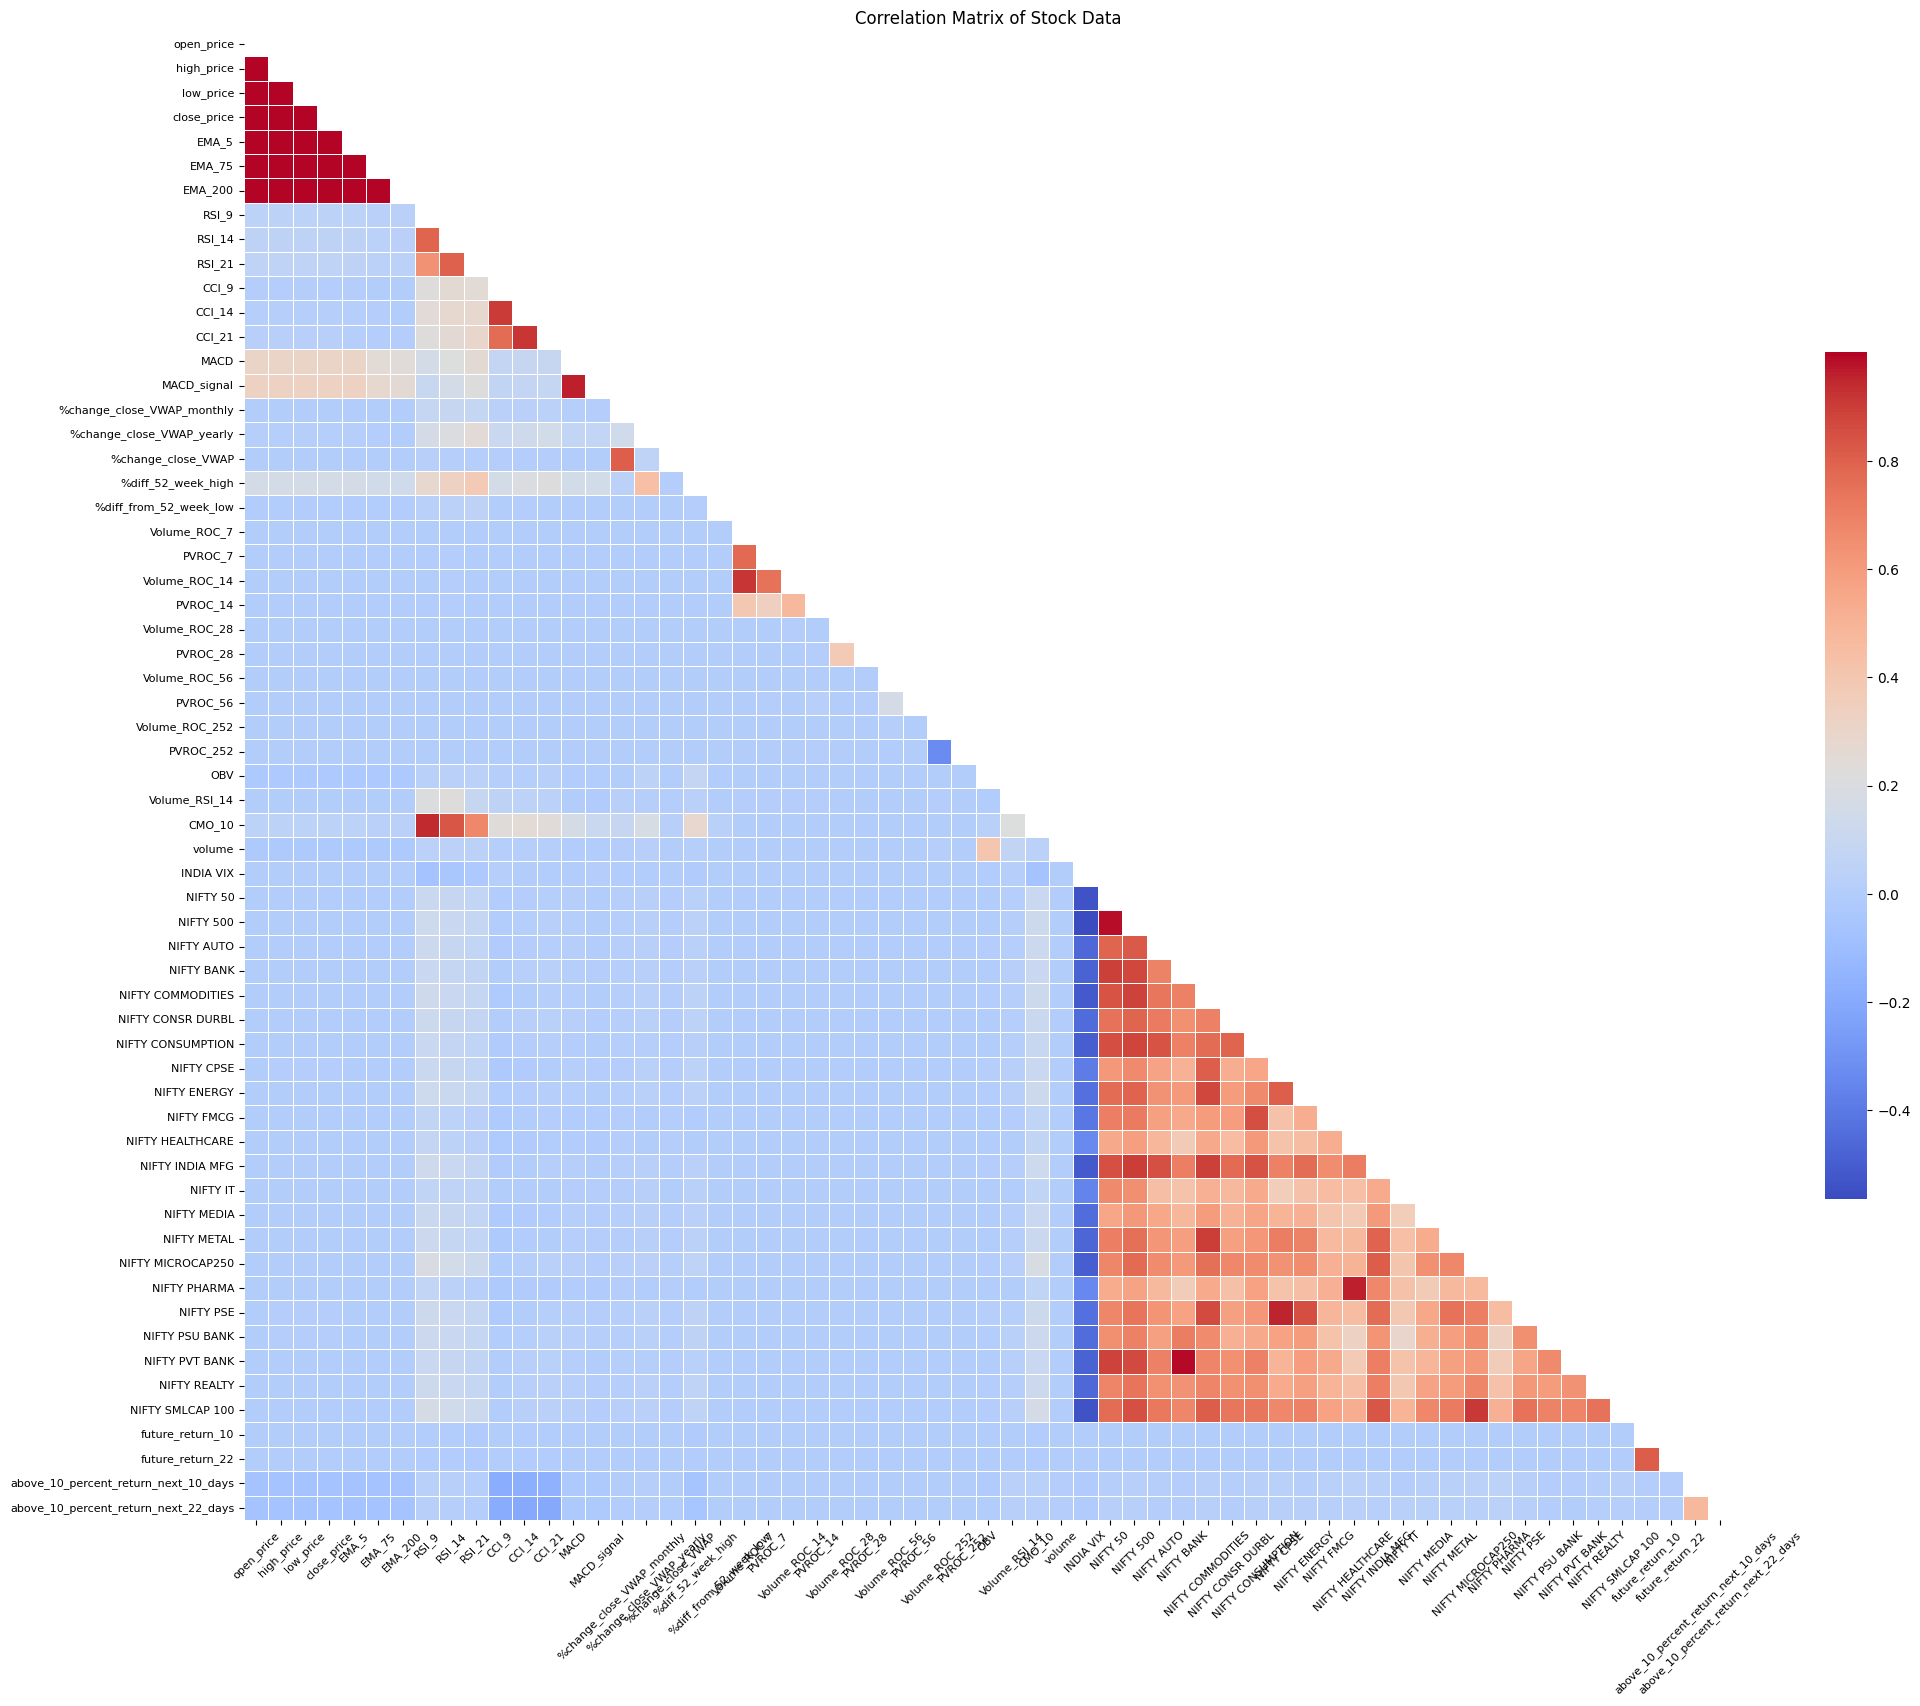

In [ ]:
# prompt: Perform statistical analysis on the various technical indicators to understand their relationships and identify potential trading opportunities.

# Perform statistical analysis on the technical indicators

import seaborn as sns
import matplotlib.pyplot as plt

# List of all columns for which you want to calculate the correlation
columns = ['open_price', 'high_price', 'low_price', 'close_price',
    'EMA_5', 'EMA_75', 'EMA_200',
              'RSI_9', 'RSI_14', 'RSI_21',
    'CCI_9', 'CCI_14', 'CCI_21', 'MACD', 'MACD_signal',

           '%change_close_VWAP_monthly', '%change_close_VWAP_yearly', '%change_close_VWAP',
              '%diff_52_week_high', '%diff_from_52_week_low',
    'Volume_ROC_7', 'PVROC_7', 'Volume_ROC_14', 'PVROC_14', 'Volume_ROC_28', 'PVROC_28',
    'Volume_ROC_56', 'PVROC_56', 'Volume_ROC_252', 'PVROC_252', 'OBV', 'Volume_RSI_14',
    'CMO_10', 'volume',
    'INDIA VIX', 'NIFTY 50', 'NIFTY 500',
       'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY ENERGY',
       'NIFTY FMCG',
       'NIFTY HEALTHCARE', 'NIFTY INDIA MFG',
        'NIFTY IT',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY',  'NIFTY SMLCAP 100', 'future_return_10', 'future_return_22',
           'above_10_percent_return_next_10_days', 'above_10_percent_return_next_22_days']

# Calculate correlations among the selected columns
correlations = merged_df[columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(24, 22))  # Adjust size to better fit the increased number of variables
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, fontsize=8)  # Adjust font size as needed
plt.yticks(fontsize=8)
plt.title("Correlation Matrix of Stock Data")
plt.show()



# Analyze the correlations to identify potential trading opportunities
# For example, if two indicators are highly correlated, you might consider using one as a confirmation for the other when making trading decisions.

# Perform other statistical analysis as needed, such as calculating standard deviations, skewness, and kurtosis.


In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
file_path = '/content/drive/My Drive/stocks_data/merged_df.csv'
merged_df.to_csv(file_path, index=False)

In [ ]:
# prompt: count number of columns in merged_df

print(len(merged_df.columns))


73


In [ ]:
# Find the range of momentum_score across the entire DataFrame
momentum_range = {
    'min_momentum': merged_df['momentum_score'].min(),
    'max_momentum': merged_df['momentum_score'].max()
}

print(momentum_range)


{'min_momentum': 0.045363323013096764, 'max_momentum': 0.8320994767375001}


In [ ]:
# Check for NaN values in each column and get their count
nan_counts = merged_df.isna().sum()

# Filter columns that have NaN values and their counts
nan_columns = nan_counts[nan_counts > 0]

# Print each column name and its NaN count explicitly
for column, count in nan_columns.items():
    print(f'{column}: {count}')


momentum_score: 1
future_return_10: 22919
future_return_22: 50262


In [ ]:

# Iterate over each column and round only if it's numeric
# Including integers, floats, and any other numeric types
for column in merged_df.select_dtypes(include=['number']):
    merged_df[column] = merged_df[column].astype('float').round(2)

# Show the result
print(merged_df)

             index  instrument_token         id tradingsymbol timestamps  \
0              0.0             257.0  4374999.0   GOLDSTAR-SM 2019-02-21   
300          300.0             257.0  4375001.0   GOLDSTAR-SM 2019-02-25   
299          299.0             257.0  4375008.0   GOLDSTAR-SM 2019-03-07   
298          298.0             257.0  4375010.0   GOLDSTAR-SM 2019-03-19   
297          297.0             257.0  4375013.0   GOLDSTAR-SM 2019-04-22   
...            ...               ...        ...           ...        ...   
2258905  2258905.0         8150273.0  3083580.0         SREEL 2024-03-28   
2258904  2258904.0         8150273.0  3083584.0         SREEL 2024-04-01   
2258903  2258903.0         8150273.0  3083588.0         SREEL 2024-04-02   
2259347  2259347.0         8150273.0  3083592.0         SREEL 2024-04-03   
2259779  2259779.0         8150273.0  3083598.0         SREEL 2024-04-04   

         open_price  high_price  low_price  close_price    volume  INDIA VIX  \
0      

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import numpy as np

# Assuming 'merged_df' has the necessary features and target variable
X = merged_df.drop(['above_10_percent_return_next_10_days', 'tradingsymbol'], axis=1)
y = merged_df['above_10_percent_return_next_10_days']

# Convert datetime columns to Unix timestamp (if any)
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = X[col].astype('int64') // 10**9

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well
X = imputer.fit_transform(X)

# Check and handle infinite values
X = np.where(np.isfinite(X), X, np.nan)  # Replace infinities with NaN
imputer = SimpleImputer(strategy='mean')  # You can re-use or create a new imputer
X = imputer.fit_transform(X)  # Impute any NaNs created

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SGDClassifier for Incremental Learning
clf = SGDClassifier(random_state=42)

# Incremental learning
batch_size = 1000  # Adjust based on your memory capacity and dataset size
for start in range(0, X_train.shape[0], batch_size):
    end = min(start + batch_size, X_train.shape[0])
    clf.partial_fit(X_train[start:end], y_train[start:end], classes=np.unique(y_train))

# Make predictions and evaluate the model
y_pred_sgd = clf.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd)

# Print model evaluation results for SGDClassifier
print(f'SGD Classifier Accuracy: {accuracy_sgd}\nSGD Classifier Classification Report:\n{report_sgd}')


SGD Classifier Accuracy: 0.8490841291335145
SGD Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    576124
         1.0       0.22      0.00      0.00    101810

    accuracy                           0.85    677934
   macro avg       0.54      0.50      0.46    677934
weighted avg       0.76      0.85      0.78    677934



In [ ]:
import joblib

# Save the model
joblib.dump(clf, 'sgd_classifier_model.joblib')

['sgd_classifier_model.joblib']

In [ ]:
# Assuming you have 'close_price' and 'timestamps' in your merged_df

# Get initial and final price for the absolute return calculation
initial_price = merged_df['close_price'].iloc[0]
final_price = merged_df['close_price'].iloc[-1]

# Calculate absolute return
absolute_return = (final_price - initial_price) / initial_price

# Calculate the number of years for the period
period_years = (merged_df['timestamps'].iloc[-1] - merged_df['timestamps'].iloc[0]).days / 365.25

# Calculate CAGR
cagr = ((final_price / initial_price) ** (1 / period_years)) - 1

# Backtesting - simulating trades based on the model's predictions
# Assume that we invest in the instrument when the model predicts a return greater than 10% in next 10 or 22 days
# This is a simplified example and may need adjustment for actual trading strategy considerations
merged_df['predicted'] = clf.predict(X)  # Full dataset predictions
merged_df['strategy_return'] = merged_df['predicted'] * merged_df['future_return_10']  # Replace 'future_return_10' as needed

# Total strategy return is the sum of individual predicted period returns
total_strategy_return = merged_df['strategy_return'].sum()

# Display the results
print(f'Absolute Return: {absolute_return * 100:.2f}%')
print(f'CAGR: {cagr * 100:.2f}%')
print(f'Total Strategy Return: {total_strategy_return * 100:.2f}%')


Absolute Return: 24380.00%
CAGR: 192.98%
Total Strategy Return: 324000054778.00%


In [ ]:
# Create a DataFrame to hold trade details
trade_details = []

# Iterate through the DataFrame to simulate trades
for i in range(len(merged_df) - 10):  # Assuming 10-day future return; adjust as necessary
    if merged_df['predicted'].iloc[i] == 1:  # If the model predicts a positive return
        entry_price = merged_df['close_price'].iloc[i]
        exit_price = merged_df['close_price'].iloc[i + 10]  # Assuming we hold for 10 days

        # Avoid division by zero by ensuring entry_price is not zero
        if entry_price == 0:
            continue  # Skip this trade or handle it in a manner suitable for your context

        trade_return = (exit_price - entry_price) / entry_price
        trade_details.append({
            'entry_date': merged_df['timestamps'].iloc[i],
            'exit_date': merged_df['timestamps'].iloc[i + 10],
            'entry_price': entry_price,
            'exit_price': exit_price,
            'trade_return': trade_return
        })

# Convert trade details into a DataFrame for easier analysis
trade_details_df = pd.DataFrame(trade_details)

# Now you can analyze trade_details_df for individual trade performances
print(trade_details_df.tail())  # Show the last few trades

# Update total strategy return to use trade details instead of cumulative sum
total_strategy_return = trade_details_df['trade_return'].sum()

# Display the updated results
print(f'Absolute Return: {absolute_return * 100:.2f}%')
print(f'CAGR: {cagr * 100:.2f}%')
print(f'Total Strategy Return: {total_strategy_return * 100:.2f}%')


     entry_date  exit_date  entry_price  exit_price  trade_return
3444 2021-11-11 2021-11-26        21.00       34.00      0.619048
3445 2021-12-22 2022-01-05        54.15       45.10     -0.167128
3446 2019-01-10 2019-01-24        61.25       56.15     -0.083265
3447 2020-01-10 2020-01-24        36.60       37.45      0.023224
3448 2021-11-22 2021-12-06       351.40      383.45      0.091207
Absolute Return: 24380.00%
CAGR: 192.98%
Total Strategy Return: 775137.34%


In [ ]:
# Export the DataFrame to a CSV file
trade_details_df.to_csv('trade_details.csv', index=False)

# Use the Colab 'files' module to download the file to your local machine
# from google.colab import files
# files.download('trade_details.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming merged_df is preloaded and has the necessary features including a 'timestamps' column

# Convert timestamps to Unix time (numeric)
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps']).astype('int64') // 10**9

# Define features (X) and target (y)
X = merged_df.drop(['above_10_percent_return_next_10_days', 'tradingsymbol'], axis=1)
y = merged_df['above_10_percent_return_next_10_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Free memory
del X, y, merged_df

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Free memory
del X_train, X_test

# Initialize the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

# Save the model
model.save('my_model.h5')

# Free memory
del X_train_scaled, y_train

# Predict on the testing set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Free memory if needed
del model, X_test_scaled, y_test, y_pred

# To load the model later, you can use:
# model = load_model('my_model.h5')


Epoch 1/20
49433/49433 [==============================] - 110s 2ms/step - loss: nan - accuracy: 0.8500
Epoch 2/20
49433/49433 [==============================] - 110s 2ms/step - loss: nan - accuracy: 0.8500
Epoch 3/20
49433/49433 [==============================] - 115s 2ms/step - loss: nan - accuracy: 0.8500
Epoch 4/20
49433/49433 [==============================] - 194s 4ms/step - loss: nan - accuracy: 0.8500
Epoch 5/20
49433/49433 [==============================] - 232s 5ms/step - loss: nan - accuracy: 0.8500
Epoch 6/20
49433/49433 [==============================] - 237s 5ms/step - loss: nan - accuracy: 0.8500
Epoch 7/20
49433/49433 [==============================] - 241s 5ms/step - loss: nan - accuracy: 0.8500
Epoch 8/20
49433/49433 [==============================] - 245s 5ms/step - loss: nan - accuracy: 0.8500
Epoch 9/20
49433/49433 [==============================] - 228s 5ms/step - loss: nan - accuracy: 0.8500
Epoch 10/20
49433/49433 [==============================] - 243s 5ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21186/21186 [==============================] - 61s 3ms/step
Accuracy: 0.8498113385668812
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    576116
         1.0       0.00      0.00      0.00    101818

    accuracy                           0.85    677934
   macro avg       0.42      0.50      0.46    677934
weighted avg       0.72      0.85      0.78    677934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
